In [75]:
import numpy as np
import math

initialDist = np.loadtxt("hw7_initialStateDistribution.txt")
transitionMat = np.loadtxt("hw7_transitionMatrix.txt")
emissionMat = np.loadtxt("hw7_emissionMatrix.txt")
observations = np.loadtxt("hw7_observations.txt")
observations = observations.astype(int)

hiddenStateLength = len(initialDist) 
totalObs = len(observations)
logProb = np.zeros(shape=(hiddenStateLength, totalObs))
lastMaxSeen = np.zeros(shape=(totalObs, hiddenStateLength))

In [56]:
for i in range(hiddenStateLength):
    logProb[i][0] = math.log(initialDist[i]) + math.log(emissionMat[i][observations[0]])

In [62]:
for k in range(1, totalObs):
    for j in range(hiddenStateLength):
        max1 = float(-math.inf)
        maxOccurs = 0
        for i in range(hiddenStateLength):
            curr = logProb[i][k-1] + math.log(transitionMat[i][j]) # np.max( logProb[:,k-1] + math.log( transitionMat[:,j]))
            if(max1 < curr):
                max1 = curr
                maxOccurs = i
        logProb[j][k] = max1 + math.log(emissionMat[j][observations[k]])
        lastMaxSeen[k][j] = maxOccurs

Done


In [68]:
lastMaxSeen = lastMaxSeen.astype(int)

In [70]:
sequence = np.zeros(shape=(totalObs))
timeMat = np.zeros(shape=(totalObs))
lastMaxIndex = np.argmax(logProb[:,-1])
iteration = totalObs - 1
while(iteration >= 0):
    timeMat[iteration] = iteration
    sequence[iteration] = lastMaxIndex
    lastMaxIndex = lastMaxSeen[iteration][lastMaxIndex]
    iteration -= 1

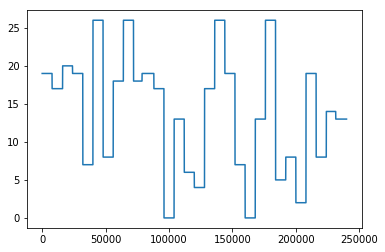

In [71]:
import matplotlib.pyplot as plt
plt.plot(timeMat, sequence)
plt.show()

In [74]:
import string
from itertools import groupby
sentence = []
for x in groupby(sequence):
    sentence.append(x[0])

d = dict(enumerate(string.ascii_lowercase, 0))
decodedString = ""
for i in sentence:
    if (i == 26):
        decodedString += " "
    else:
        decodedString += d[i]
print(decodedString)

truth is stranger than fiction
